### Here we study the three species telegraphic model of Gene regulation network defined by the following system:

$$
\begin{split}
G &\rightarrow^{k_t} G + P \hspace{20pt} \text{production of the protein P by gene G} \\
G + P &\rightleftharpoons^{k_b}_{k_u} G^* \hspace{20pt} \text{inactivation of the gene G by protein P}\\
P &\rightarrow^{k_{2P}} \emptyset \hspace{20pt} \text{Degradation of protein P}
\end{split}
$$

In [1]:
push!(LOAD_PATH, "../src/Achedmy/")
using Achedmy
using Pkg
using PyPlot
using Catalyst
using LinearAlgebra
using DifferentialEquations
using LaTeXStrings

In [2]:
gene_system = @reaction_network begin
    @species G(t) = 0.01 G_star(t) = 1. P(t) = 0.1 
    @parameters k_t = 10. k_b = 1. k_u = 0.1 k_2P = 2.
   (k_t), G --> G + P
   (k_b,k_u), G + P <--> G_star
   (k_2P), P --> 0 
end

Model ##ReactionSystem#235
States (3):
  G(t) [defaults to 0.01]
  G_star(t) [defaults to 1.0]
  P(t) [defaults to 0.1]
Parameters (4):
  k_t [defaults to 10.0]
  k_b [defaults to 1.0]
  k_u [defaults to 0.1]
  k_2P [defaults to 2.0]

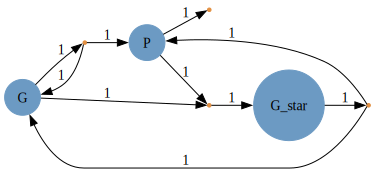

In [3]:
Graph(gene_system)

### Insert some Gillespie time traces with code here!

In [4]:
#Parameters for the simulation
tstart= 0.
tmax = 3.5
atol = 1e-3
rtol = 1e-2

0.01

In [5]:
alpha_range = exp10.(range(-2, stop=1, length=10))
println(alpha_range)

[0.01, 0.021544346900318832, 0.046415888336127795, 0.1, 0.2154434690031884, 0.4641588833612779, 1.0, 2.154434690031884, 4.641588833612778, 10.0]


In [6]:
@unpack k_u = gene_system

SOL = []
VAR = []

for i in alpha_range
    gene_system.defaults[k_u] = i
    println(gene_system.defaults)

    structure = Achedmy.ReactionStructure(gene_system)
    variables = Achedmy.ReactionVariables(structure,"cross")
    sol = Achedmy.solve_dynamics!(structure,variables,atol,rtol,tmax,tstart,"gSBR");

    push!(SOL,sol)
    push!(VAR,variables)

end

Dict{Any, Any}(G(t) => 0.01, G_star(t) => 1.0, k_b => 1.0, P(t) => 0.1, k_u => 0.01, k_t => 10.0, k_2P => 2.0)
t: 0.0
t: 1.0e-6
t: 5.999999999999999e-6
t: 1.65053789036616e-5
t: 2.971899453036518e-5
t: 7.330958458723329e-5
t: 0.0001745680165972095
t: 0.00038702325473868995
t: 0.0007157062889894946
t: 0.0013268611472890917
t: 0.0021989695066154486
t: 0.0035559271405691114
t: 0.0053576009472853375
t: 0.007855850272509303
t: 0.011019689895548732
t: 0.015069931435849674
t: 0.020037392350625256
t: 0.026054934616192287
t: 0.03327166355705599
t: 0.04168273989906765
t: 0.05160837368767763
t: 0.06286194272707443
t: 0.07598393838611225
t: 0.090563148822556
t: 0.10740866266838756
t: 0.125839202939621
t: 0.14698246155018013
t: 0.16983617394860845
t: 0.19589991939311774
t: 0.22379228628035808
t: 0.25366049298567417
t: 0.2859515270655994
t: 0.3206224789838324
t: 0.3578110283271684
t: 0.3976721459861596
t: 0.4403172081570116
t: 0.48587535295901585
t: 0.5344748574693021
t: 0.5862375950882389
t: 0.6412

In [7]:
## Saving data
using Serialization

open("../data/gene/sol_gSBR.jls", "w") do f
    serialize(f, SOL)
end
open("../data/gene/var_gSBR.jls", "w") do f
    serialize(f, VAR)
end

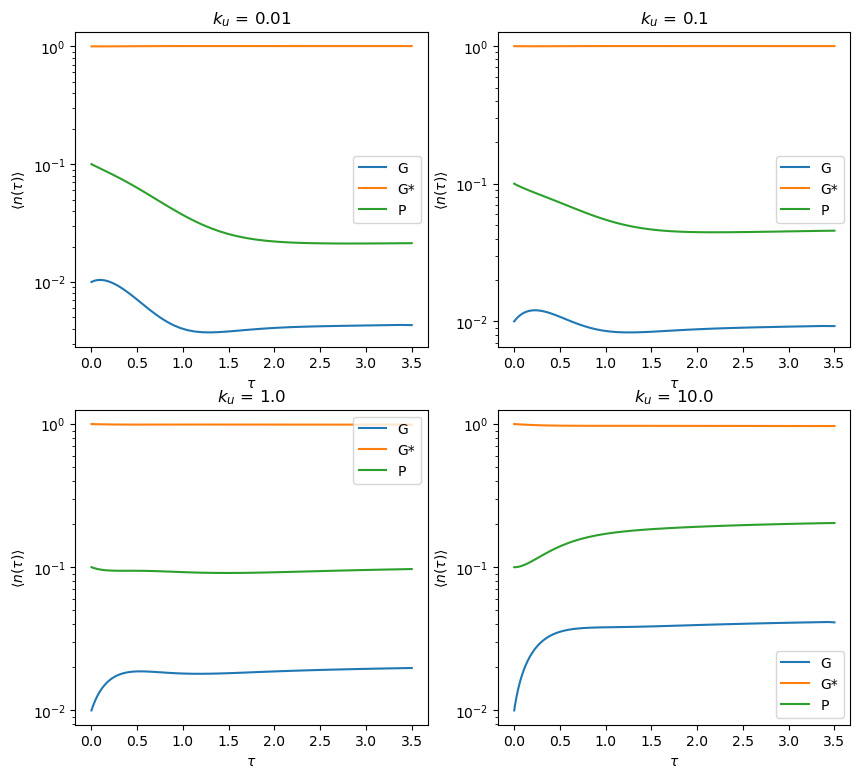

In [7]:
plot_indices = [1,4,7,10]
figure(figsize=(10,9))
for i in range(1,length(plot_indices))
    subplot(2,2,i)
    for j in range(1,length(species(gene_system)))
        plot(SOL[i].t,VAR[i].μ[j,:],label=alpha_range[plot_indices[i]])
        legend(["G","G*","P"])
    end
    title(L"$k_u$ = " * string(alpha_range[plot_indices[i]]))
    yscale("log")
    xlabel(L"$\tau$")
    ylabel(L"$\langle n(\tau)\rangle$")
end
gcf()

In [8]:
close()

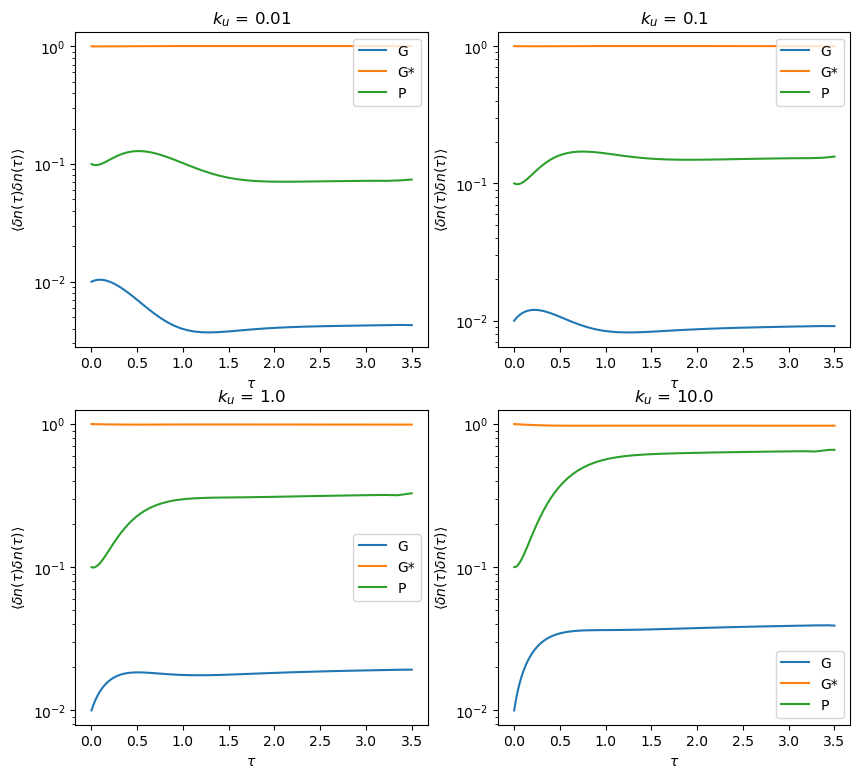

In [9]:
plot_indices = [1,4,7,10]
figure(figsize=(10,9))
for i in range(1,length(plot_indices))
    subplot(2,2,i)
    for j in range(1,length(species(gene_system)))
        plot(SOL[i].t,VAR[i].μ[j,:]+ diag(VAR[i].C[j,j,:,:]),label=alpha_range[plot_indices[i]])
        legend(["G","G*","P"])
    end
    title(L"$k_u$ = " * string(alpha_range[plot_indices[i]]))
    yscale("log")
    xlabel(L"$\tau$")
    ylabel(L"$\langle \delta n(\tau) \delta n(\tau) \rangle$")
end

gcf()

In [10]:
close()

In [11]:
## Running MAK:
@unpack k_u = gene_system

SOL_mak = []
VAR_mak = []

for i in alpha_range
    gene_system.defaults[k_u] = i
    println(gene_system.defaults)

    structure = Achedmy.ReactionStructure(gene_system)
    variables = Achedmy.ReactionVariables(structure,"single")
    sol = Achedmy.solve_dynamics!(structure,variables,atol,rtol,tmax,tstart,"MAK");

    push!(SOL_mak,sol)
    push!(VAR_mak,variables)

end

open("../data/gene/sol_mak.jls", "w") do f
    serialize(f, SOL_mak)
end
open("../data/gene/var_mak.jls", "w") do f
    serialize(f, VAR_mak)
end


Dict{Any, Any}(G(t) => 0.01, G_star(t) => 1.0, k_b => 1.0, P(t) => 0.1, k_u => 0.01, k_t => 10.0, k_2P => 2.0)
t: 0.0
t: 1.0e-6
t: 5.999999999999999e-6
t: 3.0999999999999995e-5
t: 7.620647033514596e-5
t: 0.00024737355505150086
t: 0.0008897068891845397
t: 0.0026128395031721273
t: 0.005570016553226458
t: 0.012749736512171355
t: 0.024058906971184617
t: 0.04473969595436488
t: 0.07347479636467016
t: 0.11759308130903759
t: 0.17348748631895394
t: 0.24910296808815197
t: 0.33248716358341557
t: 0.4288577753286289
t: 0.5394763897805044
t: 0.6611596994464126
t: 0.7944644775388976
t: 0.9389164213262882
t: 1.0931871077492117
t: 1.2566981920933302
t: 1.4287019504709746
t: 1.6083463380734333
t: 1.7949728946709667
t: 1.9879528272258704
t: 2.1866965686030295
t: 2.390702593175597
t: 2.599524788957927
t: 2.812768553307637
t: 3.0300941068070584
t: 3.251206165673931
t: 3.4758485884275223
  2.140944 seconds (5.11 M allocations: 253.375 MiB, 1.55% gc time, 99.50% compilation time)
Dict{Any, Any}(G(t) => 0.01,

UndefVarError: UndefVarError: `serialize` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
Hint: a global variable of this name may be made accessible by importing Serialization in the current active module Main

### Compare with other dynamical methods:

Note that now we use other libraries and code written in python for the implementation of other dynamical methods. They are not originally intended to be a part of the package.

In [141]:
using PyCall
using Pkg
using Conda

py"""
import sys
sys.path.append("../extras/other_dynamics")
"""

@pyimport cheMASTER
@pyimport emre

@pyimport numpy as np
@pyimport importlib
#@pyimport matplotlib.pyplot as plt

#If packages need to be reloaded, they must be first loaded and then reloaded in the following way:
#emre2 = pyimport("emre")
#importlib.reload(emre)
#pyimport("importlib")["reload"](emre2)
#pyimport("importlib")["reload"](emre2.dynamics)

PyObject <module 'emre.dynamics' from '/Users/harsh/Work/code/achedmy/examples/../extras/other_dynamics/emre/dynamics.py'>

In [18]:
# Setting up the reactions and the parameters:

num_species     = 3 #Number of species in the reaction system
num_interaction = 3 # Number of interating reactions in the Hamiltonian
num_reactions   = 2*num_species + num_interaction # This counts the total number of possible reactions in the system.
                                        # We have 2N creation and destruction reactions and the rest interaction reactions

# We take the order to be G,G*,P

# Rate constants for the reaction system: [k1 is Creation and k2 is Destruction]
k1 = np.array([0.,0.,0.]) #len must be equal to num_species
k2 = np.array([0.,0.,2.]) #len must be equal to num_species

k3 = np.array([10,1.,0.1]) 
s_i,r_i = np.zeros([num_interaction,num_species]),np.zeros([num_interaction,num_species])
rxn_par = [k1,k2,k3]

s_i[1,:] = [1,0,1] 
r_i[1,:] = [1,0,0]
s_i[2,:] = [0,1,0]
r_i[2,:] = [1,0,1]
s_i[3,:] = [1,0,1]
r_i[3,:] = [0,1,0]

#The initial concentration of the species. 
#Note: for Gillespie we start each trajectory from a Poisonian random variable with mean as the initial conc.below:
initial_values = np.array([0.01,1.,0.1])

dt = 0.05
tf = 3.5



3.5

In [19]:
#Run some Gillespie simulations
num_gill = 100
gill     = []

for i in range(1,num_gill)
    push!(gill,cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i))
    cheMASTER.gillespie_avg(gill[i],1,initial_values,0,tf,dt,10000)
    print(gill[i])
end

PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3d9c13800>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3d9c13830>

100%|##########| 1/1 [00:00<00:00, 3379.78it/s]


PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3d9c13860>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3c346e2d0>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3d91073e0>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3c34f6810>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3d9c1a3c0>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3d87cf320>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3c071b800>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3d8785880>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3d91322a0>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3c27da810>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3c2968e60>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3c296a1b0>PyObject <cheMASTER.chemical_system.chem

100%|##########| 1/1 [00:00<00:00, 1931.08it/s]


In [20]:
#Genenrate some plots
cmap = plt.get_cmap("tab10")
col = [cmap(i) for i in np.linspace(0, 1, num_gill-75)]
#cOL = plt.rcParams["axes.prop_cycle"].by_key()["color"]

25-element Vector{NTuple{4, Float64}}:
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0)
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0)
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0)
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0)
 ⋮
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0)
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0)
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0)
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0)
 (0.7372549019607844, 0.74117647058

In [ ]:
original_rcParams = copy(plt.rcParams)
rcParams = PyDict(matplotlib["rcParams"])

In [120]:
#import matplotlib

plot_params = Dict("font.size" => 70, "font.family" => "sans-serif", "text.usetex" => true, "font.weight" => 900, "axes.linewidth" => 2, "xtick.major.width" => 3, "xtick.major.size" => 5, "xtick.minor.width" => 2, "xtick.minor.size" => 3, "ytick.major.width" => 3, "ytick.major.size" => 5, "ytick.minor.width" => 2, "ytick.minor.size" => 3, "axes.labelsize" => 18, "xtick.labelsize" => 18, "ytick.labelsize" => 18)
plot_params2 = (Dict(
    "text.usetex" => false,
    "xtick.labelsize" => 20,
    "ytick.labelsize" => 20,
    "xtick.major.width" => 3,
    "ytick.major.width" => 3,
    "xtick.major.size" => 10,
    "ytick.major.size" => 10,
    "xtick.direction" => "in",
    "ytick.direction" => "in",
    "font.size" => 30,
    "figure.autolayout" => true,
    "figure.figsize" => (10, 5),
    "axes.titlesize" => 20,
    "axes.labelsize" => 20,
    "lines.linewidth" => 3,
    "lines.markersize" => 3,
    "legend.fontsize" => 13,
    "mathtext.fontset" => "stix",
    "axes.linewidth" => 3
))

merge!(rcParams,plot_params)
merge!(rcParams,plot_params2)

fig1  = plt.figure(figsize=(15,8))

ax_1 = fig1.add_axes([0.,0.525, 0.3, 0.4])
ax_2 = fig1.add_axes([0.35,0.525, 0.3, 0.4])
ax_3 = fig1.add_axes([0.7,0.525, 0.3, 0.4])

axes = [ax_1,ax_2,ax_3]
sat  = [0,3,6]
skip = 2
cOL = plt.rcParams["axes.prop_cycle"].by_key()["color"]

for i in range(1,num_species)
    for j in range(1,num_gill-75)
        if all(gill[j].y[1,:] .- 3 .< 0.)
            #axes[i].plot(gill[j].timeGrid, gill[j].y[i,:], "--", c=colors[j], alpha=1., linewidth=3)
            axes[i].plot(gill[j].timeGrid[1:skip:end], gill[j].y[i,1:skip:end], "--", c=col[j], alpha=1., linewidth=3)
        end
    end
    axes[i].spines["right"].set_visible(false)
    axes[i].spines["top"].set_visible(false)
    #axes[i].set_title("Enzyme Sat = "+str(np.round(enzyme_sat[sat[i]],2)))
    #axes[i].set_title("$k_u$ = "+str(np.round(alpha_range[sat[i]],2)),fontsize=20)
    axes[i].set_xlabel(L"${\tau}$",fontsize=22)
end
axes[1].set_ylabel(L"$n_G$",fontsize=28)
axes[2].set_ylabel(L"$n_{G^*}$",fontsize=28)
axes[3].set_ylabel(L"$n_P$",fontsize=28)
plt.savefig("../plots/gene_gillespie_new.png",bbox_inches="tight")
plt.close()

sys:1: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


## Run Master equation and EMRE solutions:

In [23]:
Master = []

for i in range(1,length(alpha_range))
    
    rxn_par[3][3] = alpha_range[i]

    push!(Master,cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i))
    cheMASTER.initialize_dynamics(Master[i],initial_values,0,tf,dt)
    cheMASTER.runDynamics(Master[i],max_num=[10,10,20],method = "Eigenvalue",crossCorrelator_tau=true,variance=true)

    #push!(EMRE,emre.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i))
    #emre.initialize_dynamics(EMRE[i],initial_values,0,tf,dt,alpha=1.,volume=1.,measureResponse=true)#,crossCorrelator_tau=true)
    #emre.runDynamics(EMRE[i])

    println(i)
end

1


100%|##########| 70/70 [01:31<00:00,  1.30s/it]


2


100%|##########| 70/70 [01:31<00:00,  1.31s/it]


3


100%|##########| 70/70 [01:33<00:00,  1.34s/it]


4


100%|##########| 70/70 [01:29<00:00,  1.29s/it]


5


100%|##########| 70/70 [01:31<00:00,  1.30s/it]


6


100%|##########| 70/70 [01:30<00:00,  1.30s/it]


7


100%|##########| 70/70 [01:30<00:00,  1.29s/it]


8


100%|##########| 70/70 [01:31<00:00,  1.31s/it]


9


100%|##########| 70/70 [01:32<00:00,  1.33s/it]


10


100%|##########| 70/70 [01:30<00:00,  1.29s/it]


In [61]:
EMRE   = []

for i in range(1,length(alpha_range))
    
    rxn_par[3][3] = alpha_range[i]
    push!(EMRE,emre.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i))
    emre.initialize_dynamics(EMRE[i],initial_values,0,tf,dt,alpha=1.,volume=1.,measureResponse=true)#,crossCorrelator_tau=true)
    emre.runDynamics(EMRE[i])

    println(i)
end

1
2
3


69it [00:00, 5297.20it/s]             
69it [00:00, 5413.12it/s]             
69it [00:00, 5781.32it/s]             


4
5
6
7
8
9
10


69it [00:00, 5564.56it/s]             
69it [00:00, 5828.24it/s]             
69it [00:00, 5808.59it/s]             
69it [00:00, 5690.83it/s]             
69it [00:00, 6396.72it/s]             
69it [00:00, 6295.70it/s]             
69it [00:00, 5996.33it/s]             


In [62]:
open("../data/gene/master.jls", "w") do f
    serialize(f, Master)
end

open("../data/gene/emre.jls", "w") do f
    serialize(f, EMRE)
end

In [222]:
plot_params3 = (Dict(
    "font.size" => 20,
    "font.family" => "sans-serif",
    "text.usetex" => true,
    "font.weight" => 900,
    "axes.linewidth" => 2,
    "xtick.major.width" => 3,
    "xtick.major.size" => 5,
    "xtick.minor.width" => 2,
    "xtick.minor.size" => 3,
    "ytick.major.width" => 3,
    "ytick.major.size" => 5,
    "ytick.minor.width" => 2,
    "ytick.minor.size" => 3,
    "axes.labelsize" => 18,
    "xtick.labelsize" => 18,
    "ytick.labelsize" => 18,
    "font.size" => 20,
))

#rcParams = PyDict(matplotlib["rcParams"])
merge!(rcParams, plot_params3)

fig1 = plt.figure(figsize=(15, 8))

ax_3 = fig1.add_axes([0., 0, 0.3, 0.4])
ax_4 = fig1.add_axes([0.35, 0, 0.3, 0.4])

ax_1 = fig1.add_axes([0., 0.525, 0.3, 0.4])
ax_2 = fig1.add_axes([0.35, 0.525, 0.3, 0.4])

ax_5 = fig1.add_axes([0.7, 0.525, 0.3, 0.4])

ax_6 = fig1.add_axes([0.7, 0., 0.3, 0.4])

axes = [ax_1, ax_2, ax_5, ax_3, ax_4, ax_6]
sat = [0, 3, 6] .+ 1
skip = 1
cOL = plt.rcParams["axes.prop_cycle"].by_key()["color"]

for i in 1:length(sat)
    for j in 1:num_species
        #axes[i].plot(QUAD2SBR[sat[i]].timeGrid[1:skip:end], QUAD2SBR[sat[i]].y[j, 1:skip:end]', linestyle="-", c=cOL[j], alpha=1., linewidth=3)
        axes[i].plot(SOL[sat[i]].t, VAR[sat[i]].μ[j, :], linestyle="-", c=cOL[j], alpha=1., linewidth=3)

        #axes[i].plot(MAK[sat[i]].timeGrid[1:skip:end], MAK[sat[i]].y[j, 1:skip:end]', linestyle=(0, (1, 1)), c=cOL[j], alpha=1., linewidth=3)
        axes[i].plot(SOL_mak[sat[i]].t, VAR_mak[sat[i]].μ[j, :], linestyle=(0, (1, 1)), c=cOL[j], alpha=1., linewidth=3)
        
        axes[i].plot(Master[sat[i]].timeGrid[1:skip:end], Master[sat[i]].y[j, 1:skip:end]', "--", c=cOL[j], alpha=1., linewidth=3)
    end
    axes[i].spines["right"].set_visible(false)
    axes[i].spines["top"].set_visible(false)
    axes[i].set_title("\$k_u\$ = " * string(round(alpha_range[sat[i]], digits=2)), fontsize=20)
    axes[i].set_yscale("log")
    axes[i].set_ylim((0.002, 2.50))
    axes[i].set(xticklabels=[])
    if i != 1
        axes[i].set(yticklabels=[])
    end
end
axes[1].set_ylabel(L"$ \langle n(\tau) \rangle $", fontsize=24)

for i in 1:length(sat)
    for j in 1:num_species
        #axes[i + 3].plot(QUAD2SBR[sat[i]].timeGrid[1:skip:end], (QUAD2SBR[sat[i]].y[j, 1:skip:end] + diag(QUAD2SBR[sat[i]].corr[j, j, 1:skip:end, 1:skip:end]))', linestyle="-", c=cOL[j], alpha=1., linewidth=3)
        
        axes[i + 3].plot(SOL[sat[i]].t, (VAR[sat[i]].μ[j,:] .+ diag(VAR[sat[i]].C[j, j, :, :])), linestyle="-", c=cOL[j], alpha=1., linewidth=3)
        #[TODO] Change this! The variance doesn't exactly match right now!
        #axes[i + 3].plot(SOL[sat[i]].t, (VAR[sat[i]].μ[j,:]), linestyle="-", c=cOL[j], alpha=1., linewidth=3)
        axes[i + 3].plot(EMRE[sat[i]].timeGrid[1:skip:end], EMRE[sat[i]].lna_var[j, j, 1:skip:end]', linestyle="dotted", c=cOL[j], alpha=1., linewidth=3)
        axes[i + 3].plot(Master[sat[i]].timeGrid[1:skip:end], Master[sat[i]].variance[j, 1:skip:end]', "--", c=cOL[j], alpha=1., linewidth=3)
    end
    axes[i + 3].spines["right"].set_visible(false)
    axes[i + 3].spines["top"].set_visible(false)
    axes[i + 3].set_xlabel(L"$ \tau $", fontsize=22)
    axes[i + 3].set_yscale("log")
    axes[i + 3].set_ylim((0.002, 5.))
    if i != 1
        axes[i + 3].set(yticklabels=[])
    end
end
axes[4].set_ylabel(L"$\langle \delta n(\tau)\delta n(\tau) \rangle $", fontsize=24)

axes[1].legend(["G, gSBR", "G, MAK", "G, Master", "G*, gSBR", "G*, MAK", "G*, Master", "P, gSBR", "P, MAK", "P, Master"], bbox_to_anchor=(1.06, 0.89), loc=1, frameon=false, fontsize=13, ncol=3)
axes[6].legend(["G, gSBR","G, LNA","G, Master","G*, gSBR","G*, LNA","G*, Master","P, gSBR","P, LNA","P, Master"],bbox_to_anchor=(1.1, 0.35), loc=1, frameon=false, fontsize=13,ncol=3)

plt.savefig("../plots/gene_means_variance.png", bbox_inches="tight")
plt.close()


sys:1: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


In [221]:
diag(VAR[sat[3]].C[1, 1, :, :])

77-element Vector{Float64}:
  0.0
 -6.268521094955889e-18
 -6.93046947808246e-11
 -4.5231339641535296e-10
 -1.270409975973462e-9
 -1.6043411253424524e-8
 -4.787707846056136e-8
 -1.468153254086842e-7
 -2.9755937204112766e-7
 -7.157127696150552e-7
  ⋮
 -0.1476380386158643
 -0.1476122423658156
 -0.14761155989157496
 -0.1476312538011306
 -0.1476672828437848
 -0.14771626031147012
 -0.14653577995326852
 -0.14994659378820235
 -0.15008762688065816

In [160]:
sat = 4

#Run one EMRE Trace with the cross-correlator measured:
rxn_par[3][3] = alpha_range[sat]
emre_corr = emre2.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i)
emre2.initialize_dynamics(emre_corr,initial_values,0,tf,dt,alpha=1.,volume=1.,measureResponse=true,crossCorrelator_tau=true)
emre2.runDynamics(emre_corr)

#Transform the correlators to get the values as a function of the lag time:
time_grid_all = emre_corr.timeGrid
corrLNA = deepcopy(emre_corr.corr)

for j in 1:length(time_grid_all)
    for k in 1:(length(time_grid_all) - j)
        corrLNA[:, :, k, j] = corrLNA[:, :, k + j, j]
    end
end

corr_gSBR = deepcopy(VAR[sat].C)
resp_gSBR = deepcopy(VAR[sat].R)
time_grid_gSBR = SOL[sat].t

for j in 1:length(time_grid_gSBR)
    for k in 1:(length(time_grid_gSBR) - j)
        corr_gSBR[:, :, k, j] = corr_gSBR[:, :, k + j, j]
        resp_gSBR[:, :, k, j] = resp_gSBR[:, :, k + j, j]
    end
end

69it [00:00, 2489.72it/s]             


In [216]:
tau = [0, 15, 30, 45, 60]
tau_SBR = [0, 6, 14, 20, 32]

i = 0
sat = 4

fig = figure(figsize=(15, 3.5))
ax1 = fig.add_axes([0, 0., 0.1, 1])
ax2 = fig.add_axes([0.11, 0., 0.19, 1])
ax3 = fig.add_axes([0.31, 0., 0.29, 1])
ax4 = fig.add_axes([0.61, 0., 0.38, 1])
z = 0
y = 0
axis = [z, ax4, ax3, ax2, ax1]
z = 0

for j in 2:length(tau)
    
    #[TODO] Change this!
    axis[j].plot(time_grid_gSBR[1:end-tau_SBR[j]], corr_gSBR[3, 3, 1:end-tau_SBR[j], tau_SBR[j]] + VAR[sat].μ[3, tau_SBR[j]] * resp_gSBR[3, 3, 1:end-tau_SBR[j], tau_SBR[j]], ".-", alpha=0.75)
    
    axis[j].plot(time_grid_all[1:end-tau[j]], corrLNA[3, 3, 1:end-tau[j], tau[j]], linestyle="dashdot", alpha=0.75)
    axis[j].plot(Master[sat].timeGrid[1:end-tau[j]], Master[sat].correlator_tau[3, 3, 1:end-tau[j], tau[j]], "--", alpha=0.75, color="gray")

    axis[j].set_title(L"\tau^\prime = " * string(tau[j] * dt))
    axis[j].spines["right"].set_visible(false)
    axis[j].spines["top"].set_visible(false)
    axis[j].set_xlabel(L"\tau-\tau\prime", fontsize=22)
    axis[j].set_ylim((0, 2))
end

ax1.set_ylabel(L"\langle \delta n_P(\tau) \delta n_P(\tau^\prime) \rangle ", fontsize=24)
ax2.set(yticklabels=[])
ax3.set(yticklabels=[])
ax4.set(yticklabels=[])

ax4.legend(["gSBR", "LNA", "Master"], bbox_to_anchor=(0.5, 0.45), loc=0, frameon=false, fontsize=14)

plt.savefig("../plots/gene_num_corr_P.png", bbox_inches="tight")
plt.close()

sys:1: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


In [169]:
matplotlib.pyplot.close()
matplotlib.pyplot.close()
matplotlib.pyplot.close()

In [ ]:
using PyPlot

plt.rcParams.update(Dict(
    "font.size" => 70,
    "font.family" => "sans-serif",
    "text.usetex" => true,
    "font.weight" => 900,
    "axes.linewidth" => 2,
    "xtick.major.width" => 3,
    "xtick.major.size" => 5,
    "xtick.minor.width" => 2,
    "xtick.minor.size" => 3,
    "ytick.major.width" => 3,
    "ytick.major.size" => 5,
    "ytick.minor.width" => 2,
    "ytick.minor.size" => 3,
    "axes.labelsize" => 18,
    "xtick.labelsize" => 18,
    "ytick.labelsize" => 18
))

fig1 = figure(figsize=(15, 8))

ax_3 = fig1.add_axes([0., 0, 0.3, 0.3])
ax_4 = fig1.add_axes([0.35, 0, 0.3, 0.3])
ax_1 = fig1.add_axes([0., 0.35, 0.3, 0.3])
ax_2 = fig1.add_axes([0.35, 0.35, 0.3, 0.3])
ax_5 = fig1.add_axes([0.7, 0.35, 0.3, 0.3])
ax_6 = fig1.add_axes([0.7, 0, 0.3, 0.3])
ax_11 = fig1.add_axes([0., 0.7, 0.3, 0.3])
ax_22 = fig1.add_axes([0.35, 0.7, 0.3, 0.3])
ax_55 = fig1.add_axes([0.7, 0.7, 0.3, 0.3])

axes = [ax_1, ax_2, ax_5, ax_3, ax_4, ax_6, ax_11, ax_22, ax_55]
sat = [0, 3, 6]
skip = 1
cOL = plt.rcParams["axes.prop_cycle"].by_key()["color"]

for i in 1:length(sat)
    axes[i].plot(QUAD2SBR[sat[i]].timeGrid[1:skip:end], diagm(QUAD2SBR[sat[i]].corr[1, 3, 1:skip:end, 1:skip:end])', linestyle="-", c=cOL[1], alpha=1., linewidth=3)
    axes[i].plot(EMRE[sat[i]].timeGrid[1:skip:end], EMRE[sat[i]].lna_var[1, 3, 1:skip:end]', linestyle="dashdot", c=cOL[2], alpha=1., linewidth=3)
    axes[i].plot(MASTER_CORR[sat[i]].timeGrid[1:skip:end], MASTER_CORR[sat[i]].correlator_tau[1, 3, 1, 1:skip:end]', "--", c="gray", alpha=1., linewidth=3)
    
    axes[i].spines["right"].set_visible(false)
    axes[i].spines["top"].set_visible(false)
    axes[i].set_ylim((-0.055, 0.75))
    axes[i].set(xticklabels=[])
    if i != 1
        axes[i].set(yticklabels=[])
    end
end

axes[1].set_ylabel(L"\langle \delta n_G(\tau)\delta n_P(\tau) \rangle", fontsize=24)

for i in 1:length(sat)
    axes[i + 3].plot(QUAD2SBR[sat[i]].timeGrid[1:skip:end], diagm(QUAD2SBR[sat[i]].corr[2, 3, 1:skip:end, 1:skip:end])', linestyle="-", c=cOL[1], alpha=1., linewidth=3)
    axes[i + 3].plot(EMRE[sat[i]].timeGrid[1:skip:end], EMRE[sat[i]].lna_var[2, 3, 1:skip:end]', linestyle="dashdot", c=cOL[2], alpha=1., linewidth=3)
    axes[i + 3].plot(MASTER_CORR[sat[i]].timeGrid[1:skip:end], MASTER_CORR[sat[i]].correlator_tau[2, 3, 1, 1:skip:end]', "--", c="gray", alpha=1., linewidth=3)
                        
    axes[i + 3].spines["right"].set_visible(false)
    axes[i + 3].spines["top"].set_visible(false)
    axes[i + 3].set_xlabel(L"\tau", fontsize=22)
    axes[i + 3].set_ylim((-0.055, 0.65))
    if i != 1
        axes[i + 3].set(yticklabels=[])
    end
end

axes[4].set_ylabel(L"\langle \delta n_{G^*}(\tau)\delta n_P(\tau) \rangle", fontsize=24)

for i in 1:length(sat)
    axes[i + 6].plot(QUAD2SBR[sat[i]].timeGrid[1:skip:end], diagm(QUAD2SBR[sat[i]].corr[1, 2, 1:skip:end, 1:skip:end])', linestyle="-", c=cOL[1], alpha=1., linewidth=3)
    axes[i + 6].plot(EMRE[sat[i]].timeGrid[1:skip:end], EMRE[sat[i]].lna_var[1, 2, 1:skip:end]', linestyle="dashdot", c=cOL[2], alpha=1., linewidth=3)
    axes[i + 6].plot(MASTER_CORR[sat[i]].timeGrid[1:skip:end], MASTER_CORR[sat[i]].correlator_tau[1, 2, 1, 1:skip:end]', "--", c="gray", alpha=1., linewidth=3)
            
    axes[i + 6].spines["right"].set_visible(false)
    axes[i + 6].spines["top"].set_visible(false)
    axes[i + 6].set(xticklabels=[])
    axes[i + 6].set_title("\$k_u\$ = " * string(round(alpha_range[sat[i]], digits=2)), fontsize=20)
    axes[i + 6].set_ylim((-0.027, 0.04))
    if i != 1
        axes[i + 6].set(yticklabels=[])
    end
end

axes[7].set_ylabel(L"\langle \delta n_G(\tau)\delta n_{G^*}(\tau) \rangle", fontsize=24)

axes[1].legend(["SBRC-M", "LNA", "Master"], bbox_to_anchor=(1., 0.75), loc=1, frameon=false, fontsize=16, ncol=1)


In [ ]:
Master_response = []

for i in range(1,length(alpha_range))
    
    rxn_par[3][3] = alpha_range[i]
    rxn_par[1]    = rxn_par[1] .+ 0.001

    push!(Master_response,cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i))
    cheMASTER.initialize_dynamics(Master_response[i],initial_values,0,tf,dt)
    cheMASTER.runDynamics(Master_response[i],max_num=[10,10,20],method = "Euler",measureResponse="finite-cross",measureResponse_par=[1.1,1])
    
    println(i)

end
rxn_par[1] = k1

open("../data/gene/Master_response.jls", "w") do f
    serialize(f, Master_response)

### Plotting the time averaged trajectory errors:
